In [29]:
import tensorflow as tf
from keras.layers import Dense, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [30]:
from numpy.random import seed
seed(1)

In [31]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 1) Import Datasets

In [32]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [33]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns
X_val.drop(columns=['Unnamed: 0','FLAG'], inplace = True)
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True)

### 2.1) NN with 1 hidden layer and 45 neurons

In [34]:
H = 45

model1 = tf.keras.Sequential()
model1.add(Input(shape=(62,)))
model1.add(Dense(units=H,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 45)                2835      
                                                                 
 dense_17 (Dense)            (None, 1)                 46        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


##### 2.2) Train and find optimal CT

 22/250 [=>............................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5284

2022-11-13 19:02:07.230314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


133/250 [==============>...............] - ETA: 0s

2022-11-13 19:02:08.590661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 0s 1ms/step
0.9905340890673472
Threshold value is: 0.26440504


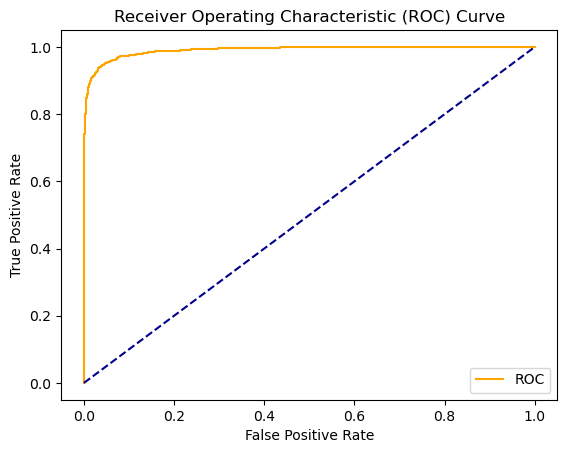

In [35]:
model1.fit(X_train,y_train)
y_scores = model1.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 2.3) Compare training and validation results

In [36]:
y_pred = (model1.predict(X_train) > optimal_threshold).astype('float')
print(classification_report(y_train,y_pred))

250/250 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6205
           1       0.89      0.94      0.91      1765

    accuracy                           0.96      7970
   macro avg       0.93      0.95      0.94      7970
weighted avg       0.96      0.96      0.96      7970



In [37]:
y_pred = (model1.predict(X_val) > optimal_threshold).astype('float')
print(classification_report(y_val,y_pred))

28/28 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       690
           1       0.89      0.95      0.92       196

    accuracy                           0.96       886
   macro avg       0.94      0.96      0.95       886
weighted avg       0.97      0.96      0.96       886



### 3.1) NN with multiple hidden layers

In [38]:
H = 45

model2 = tf.keras.Sequential()
model2.add(Input(shape=(62,)))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=H,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 45)                2835      
                                                                 
 dense_19 (Dense)            (None, 45)                2070      
                                                                 
 dense_20 (Dense)            (None, 45)                2070      
                                                                 
 dense_21 (Dense)            (None, 45)                2070      
                                                                 
 dense_22 (Dense)            (None, 1)                 46        
                                                                 
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


##### 3.2) Train and find optimal CT

 10/250 [>.............................] - ETA: 1s - loss: 0.5674 - accuracy: 0.8125  

2022-11-13 19:02:09.669097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


114/250 [============>.................] - ETA: 0s

2022-11-13 19:02:11.204096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 0s 1ms/step
roc_score: 0.996591800909894
Threshold value is: 0.30354634


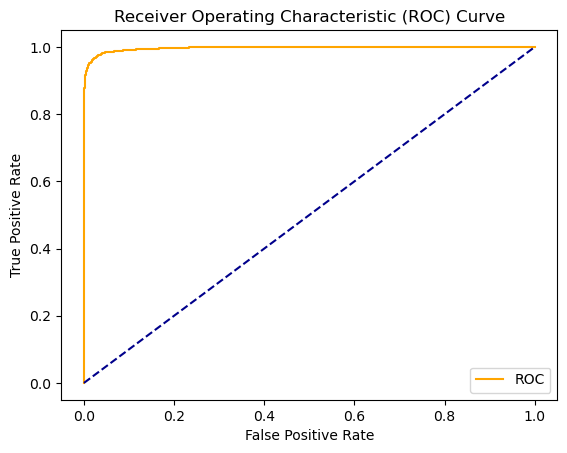

In [39]:
model2.fit(X_train,y_train)
y_scores = model2.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print("roc_score:",roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 3.3) Compare training and validation results

In [40]:
y_pred = (model2.predict(X_train) > optimal_threshold).astype('float')
print(classification_report(y_train,y_pred))

250/250 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6205
           1       0.93      0.97      0.95      1765

    accuracy                           0.98      7970
   macro avg       0.96      0.97      0.96      7970
weighted avg       0.98      0.98      0.98      7970



In [41]:
y_pred = (model2.predict(X_val) > optimal_threshold).astype('float')
print(classification_report(y_val,y_pred))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       690
           1       0.91      0.98      0.95       196

    accuracy                           0.98       886
   macro avg       0.95      0.98      0.96       886
weighted avg       0.98      0.98      0.98       886



### 4.1) NN with 6 hidden layers and 45 neurons

In [42]:
H = 45

model3 = tf.keras.Sequential()
model3.add(Input(shape=(62,)))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=H,activation='relu'))
model3.add(Dense(units=1,activation='sigmoid'))

model3.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["accuracy"])
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 45)                2835      
                                                                 
 dense_24 (Dense)            (None, 45)                2070      
                                                                 
 dense_25 (Dense)            (None, 45)                2070      
                                                                 
 dense_26 (Dense)            (None, 45)                2070      
                                                                 
 dense_27 (Dense)            (None, 45)                2070      
                                                                 
 dense_28 (Dense)            (None, 45)                2070      
                                                                 
 dense_29 (Dense)            (None, 1)                

##### 2.2) Train and find optimal CT

  7/250 [..............................] - ETA: 2s - loss: 0.6511 - accuracy: 0.7500  

2022-11-13 19:02:12.472265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 85/250 [=========>....................] - ETA: 0s

2022-11-13 19:02:14.331670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 0s 2ms/step
roc_score: 0.9965245974985905
Threshold value is: 0.25677076


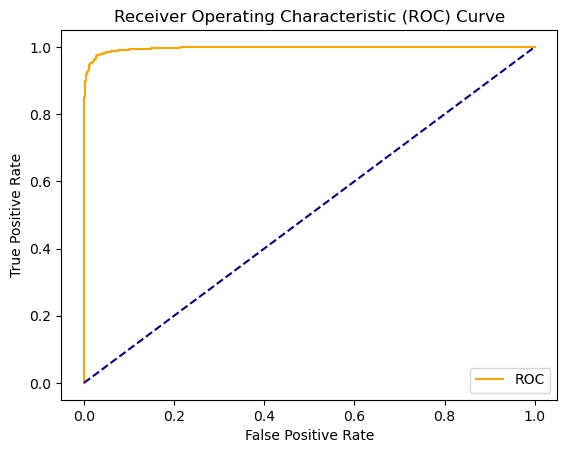

In [43]:
model3.fit(X_train,y_train)
y_scores = model3.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print("roc_score:",roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 2.3) Compare training and validation results

In [44]:
y_pred = (model3.predict(X_train) > optimal_threshold).astype('float')
print(classification_report(y_train,y_pred))

250/250 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6205
           1       0.90      0.98      0.94      1765

    accuracy                           0.97      7970
   macro avg       0.95      0.97      0.96      7970
weighted avg       0.97      0.97      0.97      7970



In [45]:
y_pred = (model3.predict(X_val) > optimal_threshold).astype('float')
print(classification_report(y_val,y_pred))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       690
           1       0.86      0.99      0.92       196

    accuracy                           0.96       886
   macro avg       0.93      0.97      0.95       886
weighted avg       0.97      0.96      0.96       886



Results are not very robust, get different results each time we run and sometimes result can be very bad